# Price Range Distribution

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")   
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df["Price range"].isnull().sum()

0

In [6]:
df = df.dropna(subset=["Price range"])

In [7]:
price_counts = df["Price range"].value_counts().sort_index()
print(price_counts)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


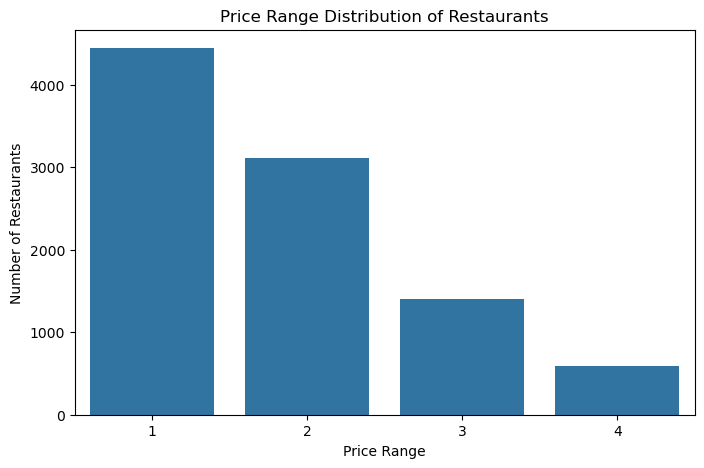

In [8]:
plt.figure(figsize=(8,5))

sns.countplot(
    x="Price range",
    data=df,
    order=sorted(df["Price range"].unique())
)

plt.title("Price Range Distribution of Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

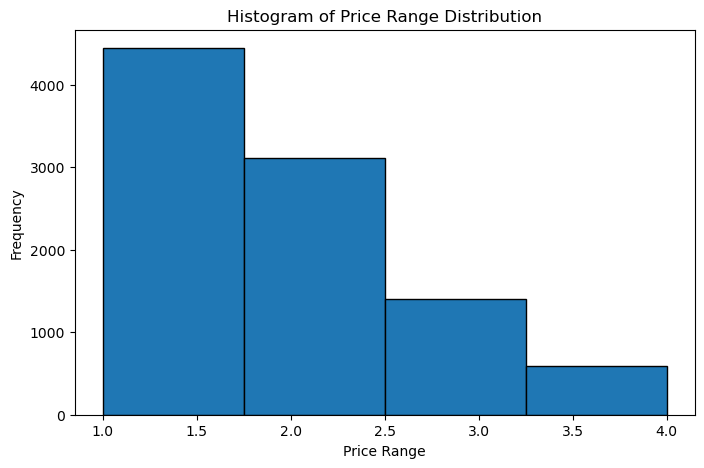

In [9]:
plt.figure(figsize=(8,5))

plt.hist(df["Price range"], bins=4, edgecolor="black")

plt.title("Histogram of Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

In [26]:
price_percentage = (
    df["Price range"]
    .value_counts(normalize=True)
    .sort_index() * 100
)

print(price_percentage)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [27]:
for price, percent in price_percentage.items():
    print(f"Price Range {price}: {percent:.2f}%")

Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


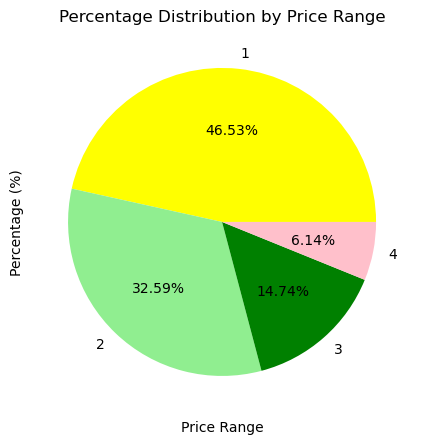

In [41]:
plt.figure(figsize=(8,5))

plt.pie(
    price_percentage,
    labels=price_percentage.index,
    autopct="%1.2f%%",colors=["yellow","lightgreen","green","pink"])

plt.title("Percentage Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.show()